# Análisis carpetas PGJ
## Introducción
- Que es?
    - Esta Base tiene las carpetas de investigación abiertas entre Enero 2022 y Abril 2023. Incluye información para identificar el momento en el tiempo donde se abrío la carpeta de investigación (etiquetado como "inicio") y el momento en el tiempo y lugar donde ocurrió el hecho en sí (etiquetado como "hechos"). Además tiene otras categorias clasificación por tipo de delito, por fiscalia-agencia-unidad que lleva la investigación.

## 1. Calidad de los datos
La calidad de los datos depende del uso que se le quiera dar. En esta sección voy a realizar un pequeño análisis exploratorio para asegurar que la base es útil para nuestro propósito.

El primer paso es leer la base, al mismo tiempo nos asegurarse que los datos faltantes sean leidos como tal correctamente y que las variables sean del tipo correcto.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
#Se lee el excel, noten que especifico que el texto "NA" significa un valor no disponible.
filename = "carpetas_2022-2023.csv"
df = pd.read_csv(filename, na_values=["NA"])

#corrige un error del csv en fecha_hechos
df.loc[df["fecha_hechos"] == '0222-03-20', ["fecha_hechos", "ao_hechos"]] = ['2022-03-20', 2022]

#corrige un error del csv en ao_hechos
df.loc[df["ao_hechos"] == 222, "ao_hechos"] = '2022-03-20'

#Lee como fechas
df["fecha_hechos"] = pd.to_datetime(df["fecha_hechos"])
df["fecha_inicio"] = pd.to_datetime(df["fecha_inicio"])

# Lee como horas
df["hora_hechos"] = pd.to_timedelta(df["hora_hechos"])
df["hora_inicio"] = pd.to_timedelta(df["hora_inicio"])

#Imprime types para asegurarse que ha leido correctamente
print(df.dtypes)

ao_hechos                        object
mes_hechos                       object
fecha_hechos             datetime64[ns]
hora_hechos             timedelta64[ns]
ao_inicio                         int64
mes_inicio                       object
fecha_inicio             datetime64[ns]
hora_inicio             timedelta64[ns]
delito                           object
fiscalia                         object
agencia                          object
unidad_investigacion             object
categoria_delito                 object
competencia                      object
alcaldia_hechos                  object
municipio_hechos                 object
colonia_datos                    object
fgj_colonia_registro             object
longitud                        float64
latitud                         float64
dtype: object


Ahora que tenemos la base de datos cargada correctamente nos aseguramos que los datos sean los esperados y que no contengan errores. De ser así se corrige.

In [3]:
# Corrige errores de "extra carriage return (\r) y newline (\n)"
df = df.replace({r'\r': '', r'\n': ''}, regex=True)

# Imprime los valores unicos de cada columna para asegurarse de tener todo correcto
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Valores de {column}:")
    print(unique_values)
    print("\n")
    
#Nota: en columna "unidad_investigacion" se repite Sin detenido 1, 2, 3, etc. 
#No voy a corregir esa columna porque necesitaría más información sobre lo que representa y apriori no pienso usarlo

Valores de ao_hechos:
[2021. 2022. 2020. 2014. 2018. 2019. 1989. 2017. 2015. 2003. 1986. 1996.
 1999. 2008. 2002. 2009. 2016. 2010. 2001. 2011. 2012. 2013.   nan 2006.
 1970. 2007. 1969. 1995. 2005. 1971. 2004. 1998. 2000. 1992. 1976. 1990.
 1997. 1988. 1978. 1983. 1994. 1987. 1993. 1985. 1974. 1972. 1982. 1962.
 1991. 1980. 1979. 1955. 1984. 1981. 1950. 1977. 2023. 1967.]


Valores de mes_hechos:
['Diciembre' 'Octubre' 'Enero' 'Febrero' 'Junio' 'Agosto' 'Abril'
 'Noviembre' 'Septiembre' 'Julio' 'Marzo' 'Mayo' nan]


Valores de fecha_hechos:
['2021-12-31T00:00:00.000000000' '2021-10-29T00:00:00.000000000'
 '2022-01-01T00:00:00.000000000' ... '2023-04-29T00:00:00.000000000'
 '2000-05-04T00:00:00.000000000' '2023-04-30T00:00:00.000000000']


Valores de hora_hechos:
[82800000000000 32400000000000 81000000000000 ...  3540000000000
 84420000000000 84840000000000]


Valores de ao_inicio:
[2022 2023]


Valores de mes_inicio:
['Enero' 'Febrero' 'Marzo' 'Abril' 'Mayo' 'Junio' 'Julio' 'Agosto'
 

Valores de categoria_delito:
['ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIOLENCIA'
 'DELITO DE BAJO IMPACTO' 'LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO'
 'HECHO NO DELICTIVO' 'HOMICIDIO DOLOSO'
 'ROBO DE VEHÍCULO CON Y SIN VIOLENCIA' 'VIOLACIÓN'
 'ROBO A NEGOCIO CON VIOLENCIA' 'ROBO A REPARTIDOR CON Y SIN VIOLENCIA'
 'ROBO A PASAJERO A BORDO DE MICROBUS CON Y SIN VIOLENCIA'
 'ROBO A CASA HABITACIÓN CON VIOLENCIA'
 'ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VIOLENCIA'
 'ROBO A CUENTAHABIENTE SALIENDO DEL CAJERO CON VIOLENCIA'
 'ROBO A PASAJERO A BORDO DE TAXI CON VIOLENCIA' 'SECUESTRO'
 'ROBO A TRANSPORTISTA CON Y SIN VIOLENCIA']


Valores de competencia:
['FUERO COMUN' 'HECHO NO DELICTIVO' 'INCOMPETENCIA']


Valores de alcaldia_hechos:
['ALVARO OBREGON' 'COYOACAN' 'VENUSTIANO CARRANZA' 'BENITO JUAREZ'
 'GUSTAVO A. MADERO' 'CUAUHTEMOC' 'MIGUEL HIDALGO' 'IZTAPALAPA'
 'AZCAPOTZALCO' 'IZTACALCO' 'CUAJIMALPA DE MORELOS'
 'LA MAGDALENA CONTRERAS' 'XOCHIMILCO' 'TLAHUAC' 'TLALPAN' 'FUE

Lo que sigue es evaluar la cantidad de valores faltantes, así nos hacemos una mejor idea de qué columnas nos podrían ser más útiles y cuáles podrían traer problemas.

El resultado nos indica que los datos sobre los hechos son más problemáticos, enumero algunas observaciones.
1. Hay 70 (0.02%) carpetas que no tienen datos de tiempo sobre los hechos
2. Todas las carpetas cuentan con alcaldía de los hechos, las alcaldías marcadas como "FUERA DE CDMX" Tienen el correspondiente municipio de los hechos registrado (por eso esa columna tiene muchas NA, significa que es dentro de CDMX)
3. Hay 19715 (6.14%) carpetas sin dato sobre la colonia de los hechos.
4. En caso de decidir filtrar algunas de estas filas es importante recordar que si el hecho de que falten no es aleatorio (es decir, si el dato faltante indica algo sobre el delito, victima o victimario) entonces el análisis puede sesgarse (evaluar pros y contras o posibles mitigantes).

In [4]:
#Regresa el número de nas por columna
missing_values = df.isna().sum()
#En porcentaje, quitar comentario
#missing_values = df.isna().sum()/df.shape[0]*100
print(missing_values)

ao_hechos                   70
mes_hechos                  70
fecha_hechos                70
hora_hechos                 70
ao_inicio                    0
mes_inicio                   0
fecha_inicio                 0
hora_inicio                  0
delito                       0
fiscalia                     0
agencia                      0
unidad_investigacion       556
categoria_delito             0
competencia                  0
alcaldia_hechos              0
municipio_hechos        318049
colonia_datos            19715
fgj_colonia_registro     18529
longitud                     0
latitud                      0
dtype: int64


Checa si hay carpetas duplicadas (no hay)

In [5]:
# Checa si hay filas duplicadas
duplicated_rows = df[df.duplicated(keep=False)]
print(duplicated_rows)

Empty DataFrame
Columns: [ao_hechos, mes_hechos, fecha_hechos, hora_hechos, ao_inicio, mes_inicio, fecha_inicio, hora_inicio, delito, fiscalia, agencia, unidad_investigacion, categoria_delito, competencia, alcaldia_hechos, municipio_hechos, colonia_datos, fgj_colonia_registro, longitud, latitud]
Index: []


Por último imprimo la descripción de la base de datos, si encuentro algo raro lo corrigo. También sirve para ver el número de categorias y los rangos de los datos

In [6]:
df.describe(include='all', datetime_is_numeric = True)

,ao_hechos,mes_hechos,fecha_hechos,hora_hechos,ao_inicio,mes_inicio,fecha_inicio,hora_inicio,delito,fiscalia,agencia,unidad_investigacion,categoria_delito,competencia,alcaldia_hechos,municipio_hechos,colonia_datos,fgj_colonia_registro,longitud,latitud
count,321227.000000,321227,321227,321227,321297.000000,321297,321297,321297,321297,321297,321297,320741,321297,321297,321297,3248,301582,302768,321297.000000,321297.000000
unique,NaN,12,NaN,NaN,NaN,12,NaN,NaN,294,37,137,112,16,3,18,251,1710,1622,NaN,NaN
top,NaN,Marzo,NaN,NaN,NaN,Marzo,NaN,NaN,VIOLENCIA FAMILIAR,AGENCIA DE DENUNCIA DIGITAL,CEN-1,UI-1SD,DELITO DE BAJO IMPACTO,FUERO COMUN,CUAUHTEMOC,TLALNEPANTLA DE BAZ,CENTRO VIII,CENTRO,NaN,NaN
freq,NaN,41180,NaN,NaN,NaN,43981,NaN,NaN,50338,50108,32595,148794,278691,312067,47548,494,3089,8906,NaN,NaN
mean,2022.051792,NaN,2022-06-25 09:32:40.479038720,0 days 12:32:37.409619988,2022.253946,NaN,2022-09-03 05:12:35.133101568,0 days 14:25:40.408080374,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-93.416789,18.265301
min,1950.000000,NaN,1950-05-05 00:00:00,0 days 00:00:00,2022.000000,NaN,2022-01-01 00:00:00,0 days 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-99.341340,0.000000
25%,2022.000000,NaN,2022-04-06 00:00:00,0 days 09:00:00,2022.000000,NaN,2022-05-07 00:00:00,0 days 11:26:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-99.172884,19.319970
50%,2022.000000,NaN,2022-08-08 00:00:00,0 days 12:00:00,2022.000000,NaN,2022-09-02 00:00:00,0 days 15:02:46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-99.136610,19.380513
75%,2022.000000,NaN,2022-12-12 00:00:00,0 days 17:00:00,2023.000000,NaN,2023-01-03 00:00:00,0 days 19:01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-99.084420,19.434176
max,2023.000000,NaN,2023-04-30 00:00:00,0 days 23:59:00,2023.000000,NaN,2023-04-30 00:00:00,0 days 23:59:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,19.578880


## Graficas preliminares

Antes de empezar con el análisis principal, quiero graficar el número de carpetas a distintas frecuencias. La razón de esto es irnos familiarizando con las caracteristicas de las series de tiempo.

Observaciones:
- No conviene tomar como referencia año de los hechos, el motivo es que los delitos registrados a partir de 2022 van a tender a reportar hechos ocurridos recientemente, por lo tanto, si tomaramos como referencia el año de los hechos, artificialmente tendríamos una serie de tiempo creciente.

In [7]:
# Aqui elegimos que columna va a ser nuestra referencia
df.set_index('fecha_inicio', inplace=True)

Para empezar a establecer ideas voy a graficar todas las carpetas de investigacion abiertas con 4 frecuencias, diaria, semanal, mensual y trimestral. Así podemos elegir cómo vamos a representar la información.

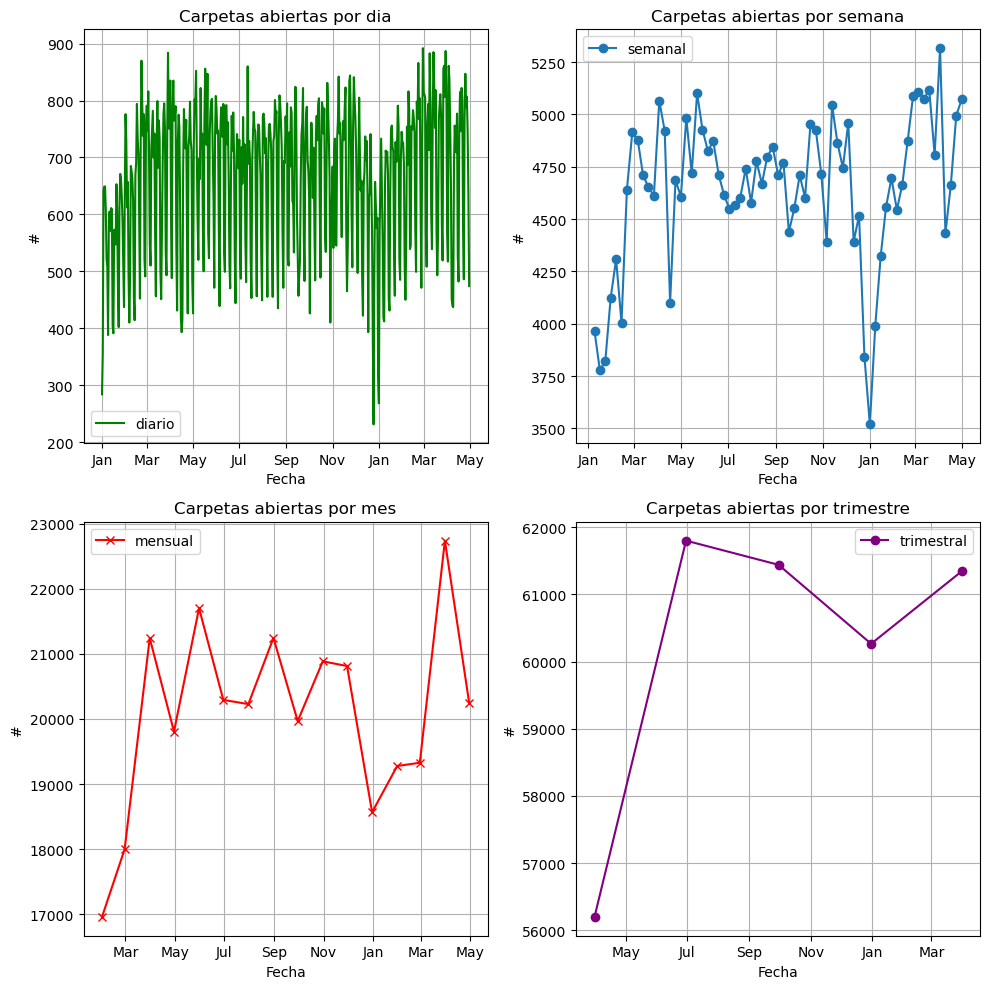

In [8]:
# Resample by day, week and month
todo_counts_day = df.resample('D').size()
todo_counts_week = df.resample('W').size()[1:]
todo_counts_month = df.resample('M').size()
todo_counts_trimestral = df.resample('Q').size()[0:-1]

# Create subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

# Daily plot
axs[0, 0].plot(todo_counts_day.index, todo_counts_day.values, marker='', color = 'green', label='diario')
axs[0, 0].set_title('Carpetas abiertas por dia')
axs[0, 0].xaxis.set_major_formatter(mdates.DateFormatter('%b'))
axs[0, 0].set_ylabel('#')
axs[0, 0].set_xlabel('Fecha')
axs[0, 0].grid(True)
axs[0, 0].legend()

# Weekly plot
axs[0, 1].plot(todo_counts_week.index, todo_counts_week.values, marker='o', label='semanal')
axs[0, 1].set_title('Carpetas abiertas por semana')
axs[0, 1].xaxis.set_major_formatter(mdates.DateFormatter('%b'))
axs[0, 1].set_ylabel('#')
axs[0, 1].set_xlabel('Fecha')
axs[0, 1].grid(True)
axs[0, 1].legend()

# Monthly plot
axs[1, 0].plot(todo_counts_month.index, todo_counts_month.values, marker='x', color='red', label='mensual')
axs[1, 0].set_title('Carpetas abiertas por mes')
axs[1, 0].xaxis.set_major_formatter(mdates.DateFormatter('%b'))
axs[1, 0].set_ylabel('#')
axs[1, 0].set_xlabel('Fecha')
axs[1, 0].grid(True)
axs[1, 0].legend()

# Quarterly plot
axs[1, 1].plot(todo_counts_trimestral.index, todo_counts_trimestral.values, marker='o', color='purple', label='trimestral')
axs[1, 1].set_title('Carpetas abiertas por trimestre')
axs[1, 1].xaxis.set_major_formatter(mdates.DateFormatter('%b'))
axs[1, 1].set_ylabel('#')
axs[1, 1].set_xlabel('Fecha')
axs[1, 1].grid(True)
axs[1, 1].legend()

plt.tight_layout()
plt.show()

Observamos que:
- La frecuencia diaria parece tener un fuerte componente estacional (algunos días probablemente se reportan más delitos). Por lo que de querer usarlo tendría que tomarse en cuenta. Sin esto, visualizar esta información es más dificil
- La frecuencia semanal quita el efecto del día de la semana, además tiene una longitud definida (7 días, empezando en domingo), por lo que no requiere otro ajuste para interpretar. (se elimina primera semana por estar incompleta)
- La frecuencia mensual se ve afectada por la cantidad de días en el mes, con meses más largos teniendo en promeio más delitos. Tal vez no sea un efecto tan relevante, pero es mejor no dejar este tipo de ajustes al azar, además, los 16 meses de la base son bastante pocos para algunos tipos de análisis, pues se pierde información al agregar tantos días.
- La frecuencia trimestral tiene poca información, pero muestra más claro la tendencia. (Se elimina Q2-2023 porque esta incompleto)

## 2. Identificar delitos a la alza y baja en CDMX

Para un tomador de decisiones probablemente le importe qué delitos van al alza y a la baja en valores absolutos, es decir, para un ciudadano tomado al azar, el número de delitos absolutos es más relevante (supuesto: impacto de cada delito es igual, lo cuál no es cierto, para eso se podría ponderar qué tan grave son). Como extra, esto también evita el problema de delitos poco frecuentes. Más adelante también haré alza y baja en términos relativos.

Voy a construir las series de tiempo por delitos de manera trimestral y luego comparo Q1-2023 vs Q1-2022.

In [9]:
#Delitos trimestre, excluye Q2 porque no esta completo
delitos_trimestre = df.groupby('delito').resample('Q').size().unstack(level=0).fillna(0)[0:-1]

In [10]:
#Resta carpetas en Q1-2023 menos Q1-2022. Así se comparan trimestres similares.
cambio_delitos_absoluto = delitos_trimestre.iloc[-1] - delitos_trimestre.iloc[0]
# Print the sequences
print("Top 5 delitos que aumentaron")
print(cambio_delitos_absoluto.nlargest(5))
print("\nTop 5 delitos que se redujeron")
print(cambio_delitos_absoluto.nsmallest(5))

Top 5 delitos que aumentaron
delito
VIOLENCIA FAMILIAR            1199.0
AMENAZAS                       975.0
ROBO DE ACCESORIOS DE AUTO     816.0
FRAUDE                         542.0
USURPACIÓN DE IDENTIDAD        344.0
dtype: float64

Top 5 delitos que se redujeron
delito
COBRANZA ILEGITIMA                                      -500.0
ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA          -269.0
ENCUBRIMIENTO                                           -192.0
LESIONES CULPOSAS POR TRANSITO VEHICULAR EN COLISION    -159.0
ROBO A PASAJERO / CONDUCTOR DE VEHICULO CON VIOLENCIA   -144.0
dtype: float64


Ahora voy a hacer lo mismo pero considerando incrementos o decrementos relativos de los delitos. Tal vez puede funcionar como señal de alarma que ciertos delitos se estén disparando. Para hacer esto voy a calcular la serie de tiempo de desviaciones estandar de la media para cada delito. Nuevamente comparo Q1-2023 vs Q1-2022.

In [11]:
#transforma a z-scores para saber que tan anormal es ese municipio comparado con el resto

#Remueve delitos que ocurrieron menos de 5 veces en toda la muestra
delitos_trimestre_remueve = delitos_trimestre[delitos_trimestre.sum(axis=1) >= 5]
#Crea z-score
delitos_trimestre_zscore = delitos_trimestre_remueve.apply(lambda column: (column - column.mean()) / column.std(), axis=0)

#Calcula cambios
cambio_delitos_zscore = delitos_trimestre_zscore.iloc[-1] - delitos_trimestre_zscore.iloc[0]

# Imprime resultados
print("Top 5 delitos que aumentaron (relativamente)")
print(cambio_delitos_zscore.nlargest(5))
print("\nTop 5 delitos que se redujeron (relativamente)")
print(cambio_delitos_zscore.nsmallest(5))

Top 5 delitos que aumentaron (relativamente)
delito
PERDIDA DE LA VIDA POR AHOGAMIENTO                                   2.828427
INHUMACION, EXHUMACION Y RESPETO A LOS CADAVERES O RESTOS HUMANOS    2.738613
DISCRIMINACION                                                       2.735438
ESTUPRO                                                              2.691748
QUEBRANTAMIENTO DE SELLOS                                            2.679426
dtype: float64

Top 5 delitos que se redujeron (relativamente)
delito
ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA          -2.793082
TRATA DE PERSONAS                                       -2.787268
DDH CERESO                                              -2.704336
DELITOS AMBIENTALES                                     -2.610690
ROBO A PASAJERO / CONDUCTOR DE VEHICULO CON VIOLENCIA   -2.602443
dtype: float64


# 3. ¿Cual es la alcaldía con más delitos y cual la que menos?


Primero voy a gráficar el número de carpetas de investigación (semanal) por alcaldía. Esto no toma en cuenta población.

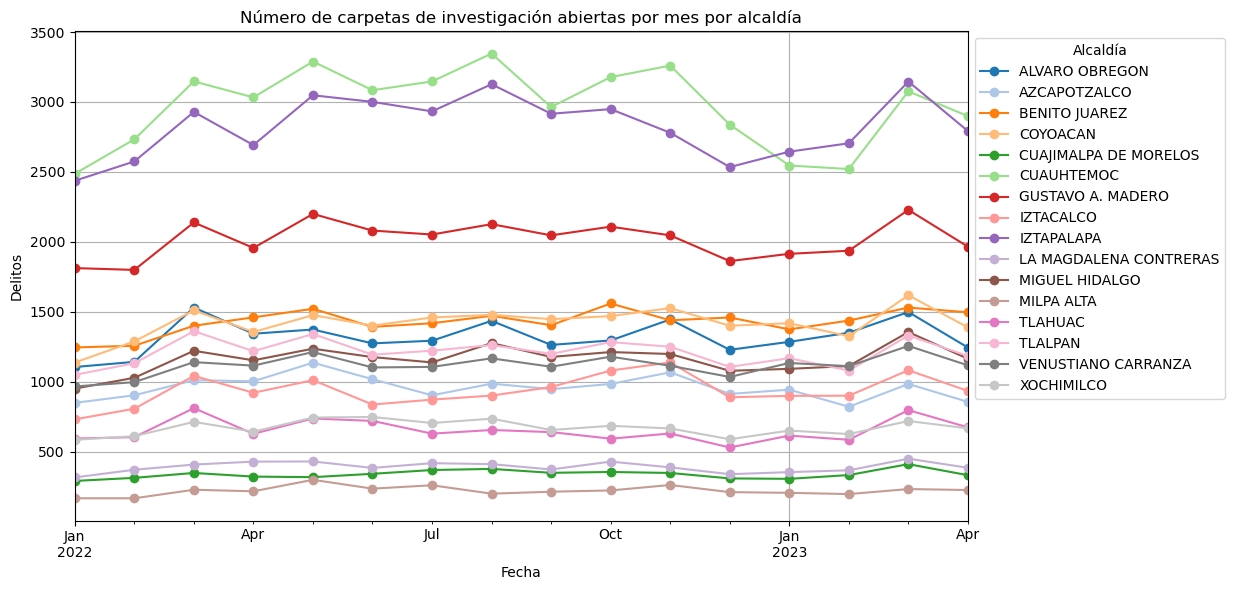

In [12]:
# Resample by week and count the number of events per category
group_alcaldia_absoluto = df.groupby(['alcaldia_hechos']).resample('M').size().T.fillna(0)

# Se excluye donde no hay alcaldia "CDMX" y fuera de CDMX
group_alcaldia_absoluto = group_alcaldia_absoluto.drop(columns=['CDMX', 'FUERA DE CDMX'])


# Plot
group_alcaldia_absoluto.plot(kind='line', marker='o', figsize=(10, 6), color = plt.cm.tab20.colors)
plt.title('Número de carpetas de investigación abiertas por mes por alcaldía')
plt.ylabel('Delitos')
plt.xlabel('Fecha')
plt.grid(True)
plt.tight_layout()
plt.legend(title='Alcaldía', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

Observaciones:
- En número total de delitos lidera la delegación Cuauhtemoc e Iztapalapa con números similares, seguido de la delegación Gustavo A. Madero. Las alcaldías con menos delitos son Milpa Alta y Cuajimalpa.
- No lo grafiqué, pero el número de carpetas donde no viene la alcaldía tiene un incremento importante desde Noviembre 2022, habría que investigar si esto es un comportamiento normal (por ejemplo, que carpetas recientes tienen menos datos) o la menor calidad de datos es por omisiones/errores/encubrimiento anormal)
- La cantidad de población en los municipios tiene una importante influencia en estos resultados. Por lo tanto es importante medir como "delitos por cada 100mil habitantes".

Voy a hacer la mísma gráfica pero ahora con las carpetas de investigación por cada 100mil habitantes. Para eso voy a utilizar la población por alcaldía en el censo 2020.

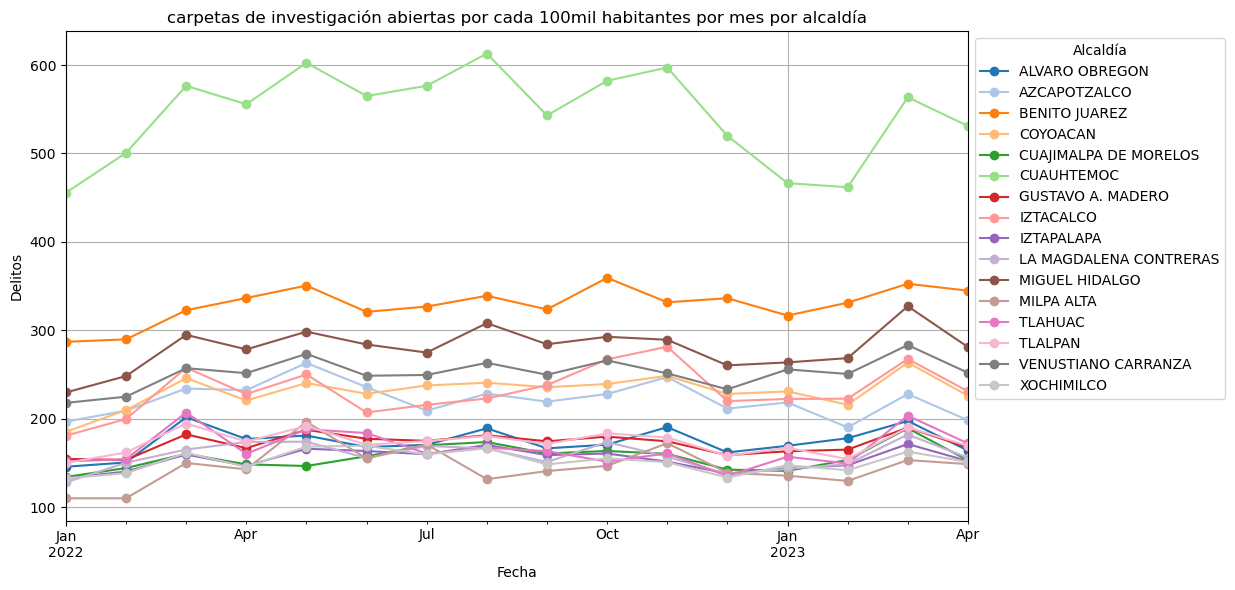

In [13]:
# Resample by week and count the number of events per category
group_alcaldia_por100 = df.groupby(['alcaldia_hechos']).resample('M').size().T.fillna(0)
group_alcaldia_por100 = group_alcaldia_por100.drop(columns=['CDMX', 'FUERA DE CDMX'])

#Fuente: Datos abiertos CDMX
poblacion_2020 = np.array([
    759137,
    432205,
    434153,
    614447,
    217686,
    545884,
    1173351,
    404695,
    1835486,
    247622,
    414470,
    152685,
    392313,
    699928,
    443704,
    442178
])/100000

group_alcaldia_por100 = group_alcaldia_por100.divide(poblacion_2020, axis='columns')

group_alcaldia_por100.plot(kind='line', marker='o', figsize=(10, 6), color = plt.cm.tab20.colors)
plt.title('carpetas de investigación abiertas por cada 100mil habitantes por mes por alcaldía')
plt.ylabel('Delitos')
plt.xlabel('Fecha')
plt.grid(True)
plt.tight_layout()
plt.legend(title='Alcaldía', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

Observaciones:
- Las alcaldías con más delitos por 100mil habitantes son cuauhtémoc, le sigue Benito Juarez, y tercero Miguel Hidalgo
- Las alcaldías con menos delitos por 100mil habitantes son Milpa Alta, le sigue Xochimilco, y tercero Iztapalapa
- Mi opinión sobre el motivo de tantos delitos en la alcaldía cuauhtemoc es que se juntan colonias de alto poder adquisitivo como roma, condesa, juarez con colonias históricamente problemáticas como doctores, obrera, tránsito además de incluir el centro de la CDMX en las colonias, con mala planeación urbana, como Centro, Guerrero y Morelos.

- Como sugerencia, dependiendo de para qué se quiera esta información, se podría simplemente tomar la suma de carpetas en 2022 y con eso hacer el ránking sin hacer la gráfica, esto podría resultar más claro.

# 4. Tendencias estacionales

Si regresamos a una gráfica anterior donde había series de tiempo por día, semana, y mes, podemos darnos una idea. Sin embargo esto estaba contando por fecha en la cual se inició la carpeta de investigación. Para esta pregunta vamos a graficar usando la fecha en que los hechos efectivamente ocurrieron.

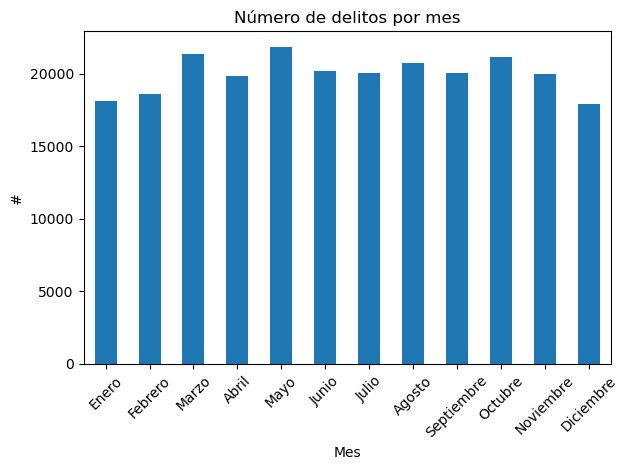

In [14]:
# Agrupa por "mes hechos" pero filtra primero el año de inicio de investigacion para que no incluya 2023
# esto es porque no está el año completo, y eso sesga la muestra.

delitos_mes = df[df['ao_inicio'] != 2023].groupby('mes_hechos').size()

# Ordena los meses
order_mes = ["Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio", "Julio", "Agosto", "Septiembre", "Octubre","Noviembre", "Diciembre"]
delitos_mes = delitos_mes.reindex(order_mes)


# Plot
delitos_mes.plot(kind='bar')
plt.title('Número de delitos por mes')
plt.ylabel('#')
plt.xlabel('Mes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Observaciones:
- Diciembre, Enero y Febrero son los meses con menos delitos. Seguramente las vacaciones influyen en esto.
- Los meses con más delitos son Mayo, Marzo y Octubre. 

Ahora vamos a ver por día de la semana

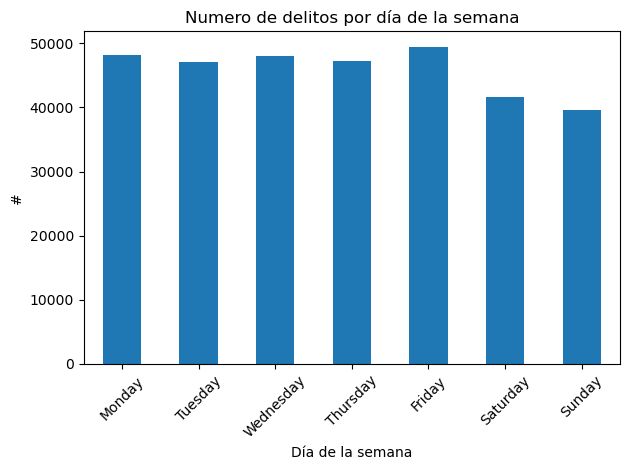

In [15]:
#Crea categoria "dia de la semana" como el día en que ocurrieron los hechos
df['dia_de_semana'] = df['fecha_hechos'].dt.strftime('%A')

# Agrupa
delitos_dia = df.groupby('dia_de_semana').size()

# Sort by the actual days of the week
order_dia = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
delitos_dia = delitos_dia.reindex(order_dia)


# Plot
delitos_dia.plot(kind='bar')
plt.title('Numero de delitos por día de la semana')
plt.ylabel('#')
plt.xlabel('Día de la semana')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Observaciones:
- Hay menos delitos en Sábado y Domingo, tal vez porque se reduce la actividad y hay menos oportunidad de conflicto. (O los delincuentes toman días de descanso?).
- El día con más delitos son los viernes, tal véz por la euforia salir del trabajo? Habría que investigar el tipo de delitos que se cometen los viernes.
- Conjetura: Algunos delitos comunes tienen fuerte componente "dia de la semana" como los relacionados con la ingesta de alcohol, o con la semana laboral.

# 5 Delitos que caracterizan a cada alcaldía


Voy a seguir este proceso:
1. calcular el numero de delitos por cada 100mil habitantes por alcaldía por tipo de delito.
2. Calcular el z-score de cada delito por alcaldía. Lo que esto quiere decir es qué tanto se desvía cada alcaldía del promedio. (alto z-score quiere decir que esa alcaldía tiene más delitos de ese tipo que el promedio. De esta manera no cometo errores comunes: No tomar en cuenta población de alcaldía, no tomar en cuenta frecuencia de delito. No tomar en cuenta que ciertas alcaldías son outliers en todos los delitos.
3. Voy a poner el top 1 delito característico de la alcaldía (si quieren ver top 3, poner top_n = 3)

In [16]:
#Selecciona delito y alcaldia hechos los pone en un dataframe y los representa como por cada 100mil habitantes
delito_alcaldia = df.groupby(['delito', 'alcaldia_hechos']).size().unstack(level=0).T.fillna(0)\
.drop(columns=['CDMX', 'FUERA DE CDMX']).divide(poblacion_2020, axis = 'columns')

#transforma a z-scores para saber que tan anormal es ese municipio comparado con el resto
delito_alcaldia_zscore = delito_alcaldia.apply(lambda row: (row - row.mean()) / row.std(), axis=1)

In [17]:
top_n = 1

# Get the top delitos (fila) con z-scores mas alto para cada alcaldia (columna)
for column in delito_alcaldia_zscore.columns:
    top_rows = delito_alcaldia_zscore[column].nlargest(top_n).index
    print(f"Alcaldia '{column}' es anormal en estos {top_n} delitos {list(top_rows)}.\n")

Alcaldia 'ALVARO OBREGON' es anormal en estos 1 delitos ['HOMICIDIO CULPOSO POR ARMA DE FUEGO'].

Alcaldia 'AZCAPOTZALCO' es anormal en estos 1 delitos ['ROBO DE MERCANCIA EN CONTENEDEROS EN ÁREAS FEDERALES'].

Alcaldia 'BENITO JUAREZ' es anormal en estos 1 delitos ['CORRUPCION DE MENORES E INCAPACES'].

Alcaldia 'COYOACAN' es anormal en estos 1 delitos ['LEY FEDERAL DE ARMAS DE FUEGO Y EXPLOSIVOS'].

Alcaldia 'CUAJIMALPA DE MORELOS' es anormal en estos 1 delitos ['MOTIN'].

Alcaldia 'CUAUHTEMOC' es anormal en estos 1 delitos ['ROBO A TRANSEUNTE EN CINE CON VIOLENCIA'].

Alcaldia 'GUSTAVO A. MADERO' es anormal en estos 1 delitos ['HOMICIDIO CULPOSO FUERA DEL D.F (ATROPELLADO)'].

Alcaldia 'IZTACALCO' es anormal en estos 1 delitos ['HOMICIDIO POR INMERSION'].

Alcaldia 'IZTAPALAPA' es anormal en estos 1 delitos ['CONCUSION'].

Alcaldia 'LA MAGDALENA CONTRERAS' es anormal en estos 1 delitos ['INCESTO'].

Alcaldia 'MIGUEL HIDALGO' es anormal en estos 1 delitos ['ROBO A NEGOCIO (NOMINA) Y 

# 6. Indicador de inseguridad

Una idea es crear un mapa que indique el numero de delitos por mes. Voy a quitar hechos no delictivos y delitos de bajo impacto para concentrarnos en delitos graves

In [18]:
# Para trabajar con mapas
import folium

In [19]:
group1 = df[~df['categoria_delito'].isin(['HECHO NO DELICTIVO', 'DELITO DE BAJO IMPACTO'])].groupby(['alcaldia_hechos']).resample('M').\
agg(
    n_delitos=('alcaldia_hechos', 'size'),
    avg_latitud=('latitud', 'median'),
    avg_longitud=('longitud', 'median')
)

In [20]:
#Ya filtrado por mes de interes
group2 = group1.loc[(slice(None), '2022-05-31'), :]

In [21]:
# Create a base map
m = folium.Map(location=[group2['avg_latitud'].median(), group2['avg_longitud'].median()], zoom_start=11)

# Add markers to the map
for _, row in group2.iterrows():
    tooltip_text = f"n_delitos: {row['n_delitos']}"
    folium.Marker(
        [row['avg_latitud'], row['avg_longitud']],
        tooltip=tooltip_text
    ).add_to(m)


# Display the map
m

Otra idea es utilizar una serie de tiempo de z-score de delitos por colonia

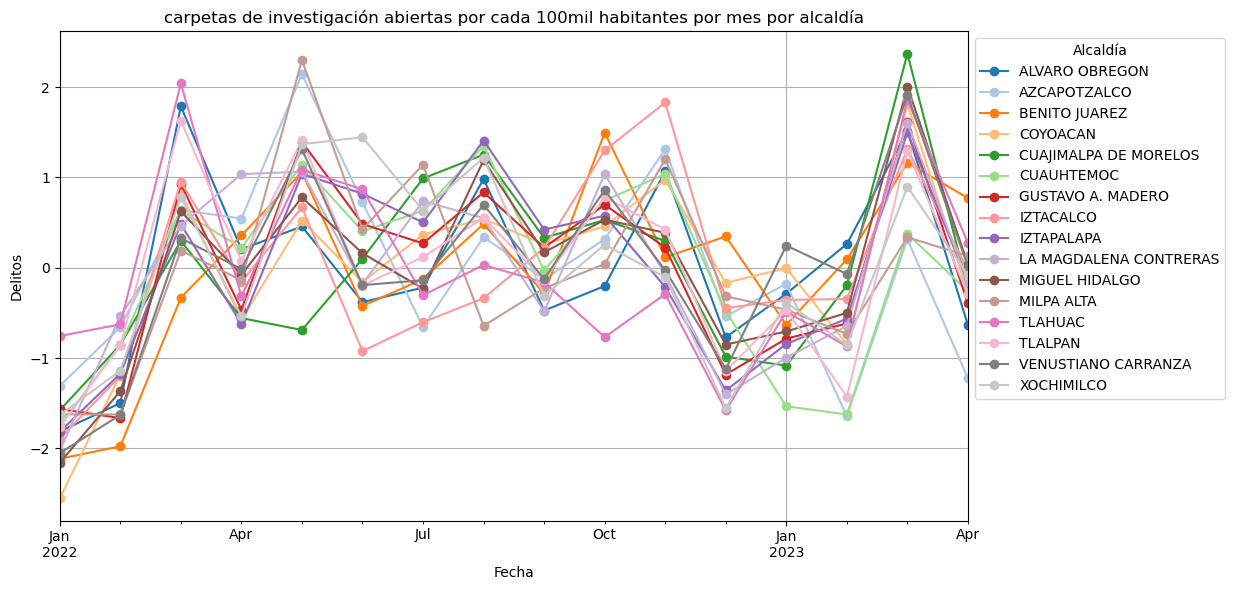

In [22]:
#Base que se usa (ver seccion 3)
group_alcaldia_por100

#Crea z-score serie de tiempo
group_alcaldia_por100_zscore = group_alcaldia_por100.apply(lambda column: (column - column.mean()) / column.std(), axis=0)

group_alcaldia_por100_zscore.plot(kind='line', marker='o', figsize=(10, 6), color = plt.cm.tab20.colors)
plt.title('carpetas de investigación abiertas por cada 100mil habitantes por mes por alcaldía')
plt.ylabel('Delitos')
plt.xlabel('Fecha')
plt.grid(True)
plt.tight_layout()
plt.legend(title='Alcaldía', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

de esta manera tenemos informacione spacial y temporal sobre los indices delictivos. or ejemplo Cuajimalpa ha tenido recientemente un incremento anormal de delitos. Se pueden tomar decisiones con la informacion presentada en este documento como que delitos atender, en donde atenderlos, y se puede observar si hay una desviacion atipica en algun lugar. Esto tambien se puede generalizar a nivel colonia para poder enforcarse en colonias con un incremento anormal en delincuencia.